In [ ]:
from google.colab import files
uploaded=files.upload()



In [2]:
uploaded
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['breast-cancer-wisconsin.csv'].decode('utf-8')))
data.head()

,id,Clump_Thickness,Cell Size,Cell Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    699 non-null    int64 
 1   Clump_Thickness       699 non-null    int64 
 2   Cell Size             699 non-null    int64 
 3   Cell Shape            699 non-null    int64 
 4   Marginal_Adhesion     699 non-null    int64 
 5   Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei           699 non-null    object
 7   Bland_Chromatin       699 non-null    int64 
 8   Normal_Nucleoli       699 non-null    int64 
 9   Mitoses               699 non-null    int64 
 10  class                 699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
data=data[data['Bare_Nuclei']!='?']

In [5]:
 data = data.astype(int)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Benign  444
Malign 239


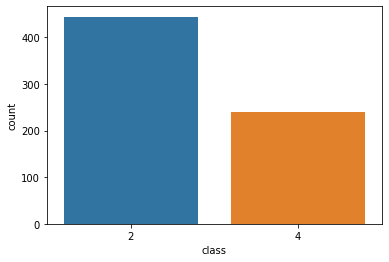

In [6]:
import seaborn as sns
ax=sns.countplot(data['class'],label='Count')
B,H=data['class'].value_counts()
print("Benign ",B)
print("Malign" ,H)

In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
X=data.iloc[:,2:-1].values
Y=data.iloc[:,-1].values


In [9]:
X[1]

array([ 4,  4,  5,  7, 10,  3,  2,  1])

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1=LabelEncoder()
y=labelencoder_X_1.fit_transform(Y)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=7)


In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
X_train

array([[-0.03819508,  0.60159769, -0.63170328, ..., -0.19093618,
         2.29774453,  0.22719534],
       [-0.03819508,  0.26512068, -0.63170328, ..., -0.19093618,
        -0.61701281, -0.35075771],
       [-0.69948308, -0.74431036, -0.63170328, ..., -0.19093618,
        -0.61701281, -0.35075771],
       ...,
       [-0.36883908, -0.40783334, -0.27529481, ...,  0.21323529,
        -0.29315088, -0.35075771],
       [-0.69948308, -0.74431036, -0.63170328, ..., -0.19093618,
        -0.61701281, -0.35075771],
       [-0.69948308, -0.74431036, -0.63170328, ..., -0.99927912,
        -0.61701281, -0.35075771]])

In [ ]:
X_test

array([[ 1.42472474,  1.554654  ,  1.22322474, -0.09612247,  1.79290261,
         1.62085732, -0.23731105,  0.81568065],
       [ 2.03744561,  2.20691209,  2.17771071,  0.33433902,  1.79290261,
         0.74678243,  1.17967669,  0.81568065],
       [-0.7197983 , -0.07599123, -0.6857472 , -0.52658396, -0.69515236,
        -0.5643299 , -0.59155799, -0.33521122],
       [-0.7197983 , -0.72824933, -0.6857472 , -0.52658396, -0.14225125,
        -0.12729246, -0.59155799, -0.33521122],
       [ 0.199283  ,  0.9023959 ,  0.90506275,  0.33433902,  1.79290261,
         0.30974499,  0.11693588, -0.33521122],
       [ 1.73108517,  0.25013781,  2.17771071,  2.91710798, -0.14225125,
         0.74678243,  0.11693588,  0.81568065],
       [-0.10707743, -0.40212028,  1.54138673,  0.76480052,  1.79290261,
         2.05789477, -0.59155799,  0.24023471],
       [ 2.03744561,  2.20691209, -0.6857472 ,  2.91710798,  1.24000151,
        -0.12729246,  0.11693588, -0.33521122],
       [-0.7197983 ,  0.25013781

In [ ]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

Training the model

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation

Using TensorFlow backend.


In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Parametre tunnning uin ANN using keras

In [ ]:
def create_model(optimizer='adam'):
  model=Sequential()
  model.add(Dense(8,kernel_initializer='uniform',activation='relu',input_dim=8))
  model.add(Dense(6,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

model=KerasClassifier(build_fn=create_model)
parameters={'batch_size':[64 ,128],'epochs':[100,200],'optimizer':['adam','rmsprop']}  


In [ ]:
grid_search=GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',
                         cv=10)
grid_search=grid_search.fit(X_train,y_train)
best_parameters=grid_search.best_params_
best_accuracy=grid_search.best_score_

Streaming output truncated to the last 5000 lines.
522/522 [==============================] - 0s 225us/step - loss: 0.6929 - accuracy: 0.5843
Epoch 2/200
522/522 [==============================] - 0s 22us/step - loss: 0.6922 - accuracy: 0.6513
Epoch 3/200
522/522 [==============================] - 0s 19us/step - loss: 0.6914 - accuracy: 0.6513
Epoch 4/200
522/522 [==============================] - 0s 24us/step - loss: 0.6906 - accuracy: 0.6513
Epoch 5/200
522/522 [==============================] - 0s 21us/step - loss: 0.6896 - accuracy: 0.6513
Epoch 6/200
522/522 [==============================] - 0s 18us/step - loss: 0.6886 - accuracy: 0.6513
Epoch 7/200
522/522 [==============================] - 0s 23us/step - loss: 0.6874 - accuracy: 0.6513
Epoch 8/200
522/522 [==============================] - 0s 26us/step - loss: 0.6860 - accuracy: 0.6513
Epoch 9/200
522/522 [==============================] - 0s 27us/step - loss: 0.6844 - accuracy: 0.6571
Epoch 10/200
522/522 [====================

In [ ]:
best_parameters

{'batch_size': 128, 'epochs': 100, 'optimizer': 'adam'}

In [ ]:
best_accuracy

0.9689655172413794

Training using K-fold

In [29]:
from keras.layers import Dropout

In [30]:
def built_classifier():

  model=Sequential()
  model.add(Dense(16,kernel_initializer='uniform',activation='relu',input_dim=8))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=built_classifier,batch_size=64,epochs=1000)
accuracies=cross_val_score(estimator= model,X=X_train,y=y_train,cv=8,n_jobs=-1)


In [31]:
accuracies

array([0.95890409, 0.98630136, 0.97260273, 0.97260273, 0.9861111 ,
       0.95833331, 0.91666669, 0.97222221])

In [32]:
accuracies.mean()

0.9654680266976357

In [33]:
accuracies.std()

0.020866095683432537

**Training-Testing model**

In [36]:
model=Sequential()
model.add(Dense(16,kernel_initializer='uniform',activation='relu',input_dim=8))
model.add(Dropout(0.2))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(X_train,y_train,batch_size=64,epochs=500,validation_split=0.2)

Train on 464 samples, validate on 116 samples
Epoch 1/500
464/464 [==============================] - 0s 52us/step - loss: 0.0810 - accuracy: 0.9741 - val_loss: 0.1057 - val_accuracy: 0.9569
Epoch 2/500
464/464 [==============================] - 0s 43us/step - loss: 0.0810 - accuracy: 0.9741 - val_loss: 0.1056 - val_accuracy: 0.9569
Epoch 3/500
464/464 [==============================] - 0s 42us/step - loss: 0.0801 - accuracy: 0.9720 - val_loss: 0.1056 - val_accuracy: 0.9569
Epoch 4/500
464/464 [==============================] - 0s 41us/step - loss: 0.0827 - accuracy: 0.9741 - val_loss: 0.1055 - val_accuracy: 0.9569
Epoch 5/500
464/464 [==============================] - 0s 42us/step - loss: 0.0783 - accuracy: 0.9741 - val_loss: 0.1055 - val_accuracy: 0.9569
Epoch 6/500
464/464 [==============================] - 0s 41us/step - loss: 0.0864 - accuracy: 0.9720 - val_loss: 0.1055 - val_accuracy: 0.9569
Epoch 7/500
464/464 [==============================] - 0s 37us/step - loss: 0.0826 - accur

In [39]:
y_pred=model.predict(X_test)

In [41]:
y_pred=(y_pred>0.5)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cn=confusion_matrix(y_test,y_pred)

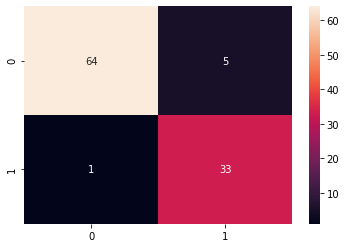

In [45]:
sns.heatmap(cn,annot=True)